# Segmentação de clientes de um supermercado

Um supermercado, através de cartões de fidelidade, possui alguns dados básicos sobre seus clientes, como idade, gênero, renda anual e pontuação de gastos. Tal pontuação é algo que o supermercado atribui ao cliente com base em parâmetros definidos, como comportamento do cliente e dados de compra.

O projeto atual visa segmentar pos clientes do supermercado através da técnica de clusterização para que o supermercado possa definir estratégias específicas para cada cliente visando aumentar sua receita. 

Link original para o dataset: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

Estrutura de pastas do projeto:

```bash
├── README.md
├── dados
│   ├── Mall_Customers.csv
├── notebooks
│   └── projeto_supermercado_01_eda.ipynb
│   └── ...
├── reports
│   └── ...
```

In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
import sklearn
from platform import python_version

bibliotecas = {
    "Pandas": pd,
    "Matplotlib": matplotlib,
    "Seaborn": sns,
    "NumPy": np,
    "Scikit-Learn": sklearn,
}

print("Versões das bibliotecas:\n")
print(f"{'':-^20} | {'':-^10}")
print(f"{'Biblioteca':^20} | {'Versão':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")

print()
print(f"Versão do Python: {python_version()}")


Versões das bibliotecas:

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
Matplotlib           |      3.9.2
NumPy                |     1.26.4
Pandas               |      2.1.4
Scikit-Learn         |      1.6.0
Seaborn              |     0.13.2

Versão do Python: 3.11.7


In [2]:
DADOS = "../dados/Mall_Customers.csv"

df = pd.read_csv(DADOS)

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
with pd.option_context("display.float_format", "{:.2f}".format):
    display(df.describe())

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


In [5]:
df.describe(exclude='number')

,Gender
count,200
unique,2
top,Female
freq,112


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
from ydata_profiling import ProfileReport
from ydata_profiling.config import Settings

# Criar a configuração customizada --> Desativar o teste de Chi-Quadrado, pois com as versões das bibliotecas usadas acima foi necessário.
my_config = Settings()
my_config.vars.cat.chi_squared_threshold = 0.0
my_config.vars.num.chi_squared_threshold = 0.0  

# Gerar o relatório
profile = ProfileReport(df, config=my_config)

# Salvar em HTML
profile.to_file("../relatorios/EDA_supermercado.html")



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:00<00:00, 10.80it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<font color='red'> **OBS:** Ao executar o código acima o plt.show() para de funcionar abaixo. Se o erro acontecer, basta reiniciar o kernel.

In [8]:
df_analise = df.copy()
df_analise = df_analise.drop("CustomerID", axis=1)

df_analise.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


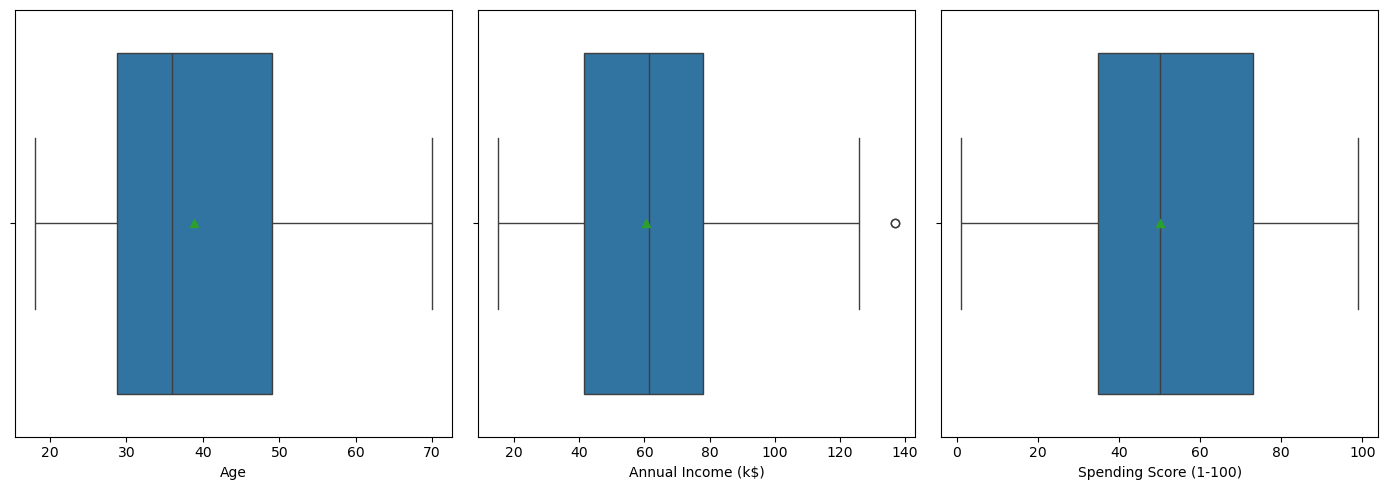

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14,5), tight_layout=True)

for ax, coluna in zip(axs.flatten(), df_analise.select_dtypes('number')):
    sns.boxplot(data=df_analise, x=coluna, ax=ax, showmeans=True)

plt.show()

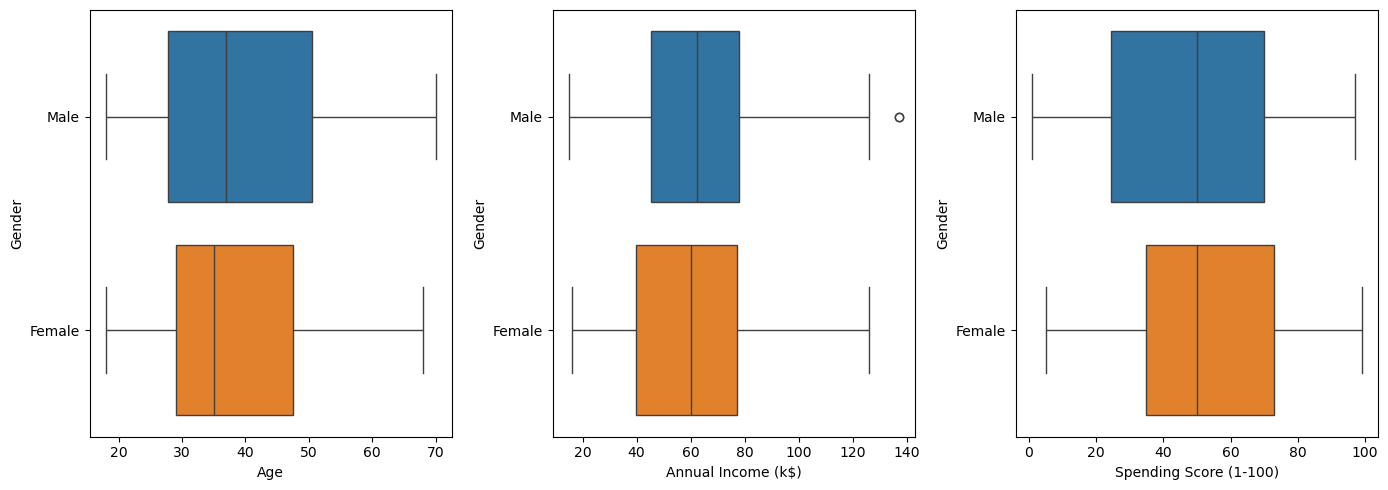

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(14,5), tight_layout=True)

for ax, coluna in zip(axs.flatten(), df_analise.select_dtypes('number')):
    sns.boxplot(data=df_analise, x=coluna, y='Gender', hue='Gender', ax=ax)# palette='Set2')

plt.show()

In [11]:
df_analise.corr(numeric_only=True)        

# Os valores de correlação não são iguais do pandas profiling porque os métodos de calcular correlaçaõ são diferentes 
# COrrelação do pandas: Pearson
# Correlação do ydata-profiling = 'spearman'

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [12]:
df_analise.corr(numeric_only=True, method='spearman')

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,0.019767,-0.34494
Annual Income (k$),0.019767,1.000000,0.00784
Spending Score (1-100),-0.344940,0.007840,1.00000


In [13]:
with pd.option_context('display.float_format', "{:.3f}".format):
    display(df_analise.corr(numeric_only=True, method='pearson'))

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000,-0.012,-0.327
Annual Income (k$),-0.012,1.000,0.010
Spending Score (1-100),-0.327,0.010,1.000


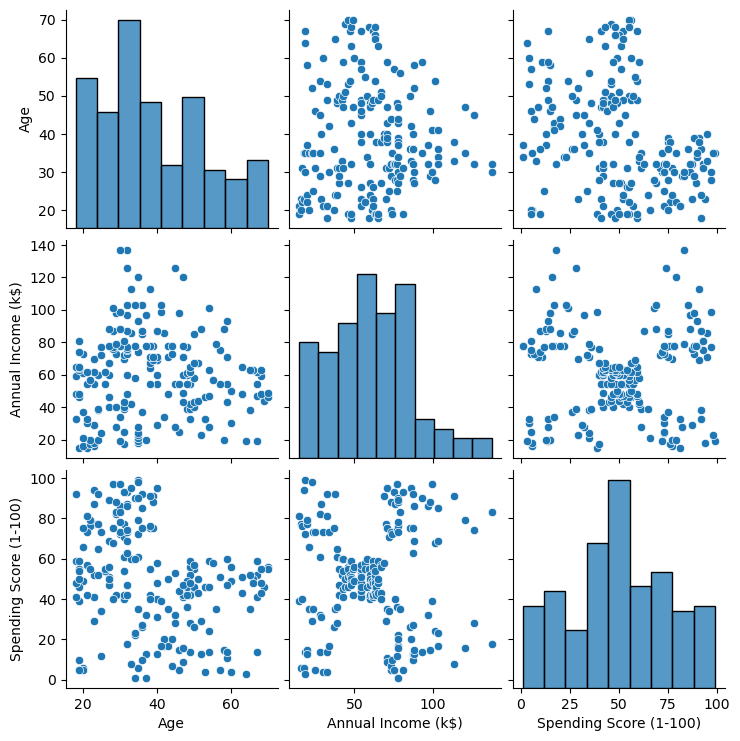

In [14]:
sns.pairplot(df_analise)

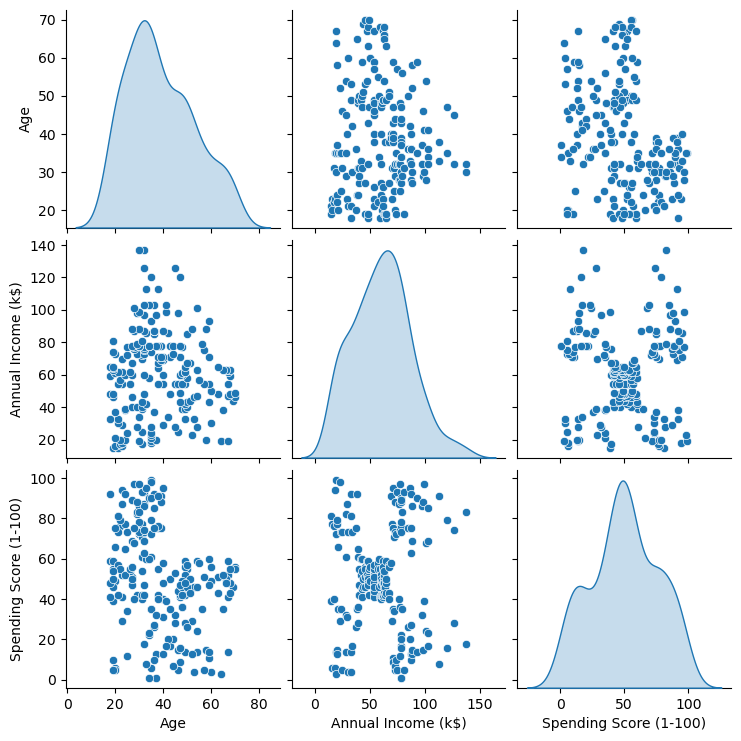

In [15]:
sns.pairplot(df_analise, diag_kind='kde')

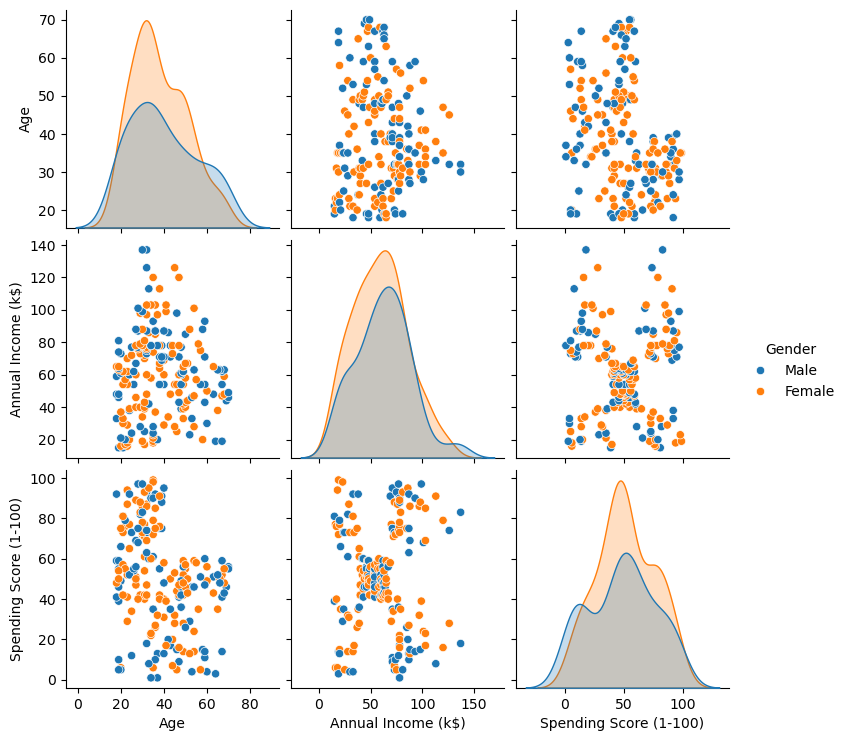

In [16]:
sns.pairplot(df_analise, diag_kind='kde', hue='Gender')

In [17]:
df_analise.to_csv("../dados/Mall_Customer_no_CustomerID.csv", index=False)